In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
tf.config.run_functions_eagerly(True)  #was getting some error in training part, but using this removed that error

In [3]:
trainset = pd.read_csv("train.csv")
testset= pd.read_csv("test.csv")

In [4]:
trainset.shape

(42000, 785)

In [5]:
trainset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
testset.shape

(28000, 784)

In [7]:
testset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
trainset.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
testset.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [10]:
X= trainset.drop(labels = ["label"],axis = 1) 

y = trainset["label"]

In [11]:
print(X)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0         0
41998       0       0       0       0  ...         0         0         0         0
41999       0       0       0       0  ...         0         0         0         0

[42

In [12]:
print(y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

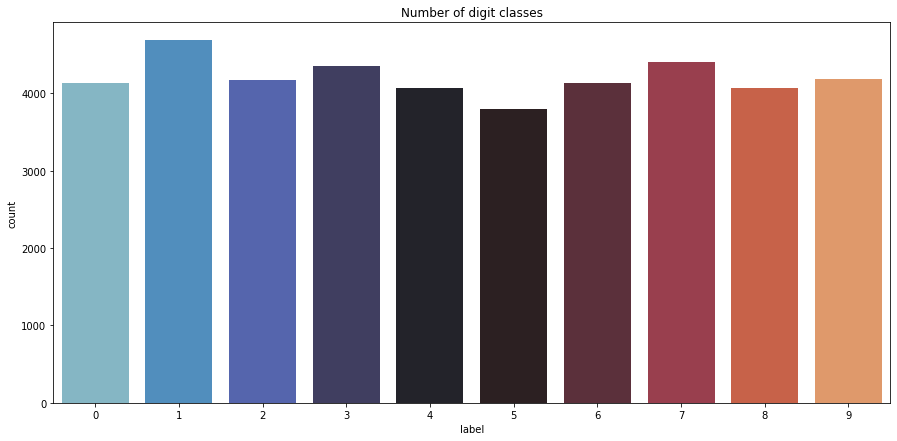

In [13]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y, palette="icefire")
plt.title("Number of digit classes")
y.value_counts()

Normalization
We perform a grayscale normalization to reduce the effect of illumination's differences.

In [14]:
X = X / 255.0
testset = testset / 255.0

Reshape:
Train and test images (28 x 28)
We reshape all data to 28x28x1 3D matrices.
Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.


In [15]:
# Reshape
X = X.values.reshape(-1,28,28,1)
testset = testset.values.reshape(-1,28,28,1)

 encoding 'labels' i.e. y

In [16]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y = to_categorical(y, num_classes = 10)

In [17]:
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Splitting

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [19]:
X_train.shape

(33600, 28, 28, 1)

In [20]:
X_val.shape

(8400, 28, 28, 1)

In [21]:
y_train.shape

(33600, 10)

In [22]:
y_val.shape

(8400, 10)

Initialising the cnn

In [23]:
cnn=tf.keras.models.Sequential()

Convolution: adding 1st convolutional layer

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]))

Applying max pooling

In [25]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Adding 2nd convolution layer

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


Flattening

In [27]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [28]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

Output layer

In [29]:
cnn.add(tf.keras.layers.Dense(10, activation = "softmax"))
#10 output neurons since we have to predict numbers from 0-9

Compiling the CNN

In [30]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#if we had to predict binary outputs then loss would be binary_crossentropy

Data Augmentation:To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
Alter the training data with small transformations to reproduce the variations of digit.
For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.

In [31]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

Training cnn on X_train,y_train and evaluating using X_val,y_val

In [32]:
#cnn.fit(x=(X_train,y_train),validation_data=(X_val,y_val),epochs=10)
#cnn.fit_generator((X_train,y_train),epochs = 10, validation_data = (X_val,y_val))
#batch_size=250,epochs=10
cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=250),epochs = 10, validation_data = (X_val,y_val), steps_per_epoch=X_train.shape[0] // 250)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/10
134/134 [==============================] - 34s 255ms/step - loss: 1.3295 - accuracy: 0.5878 - val_loss: 0.1685 - val_accuracy: 0.9508
Epoch 2/10
134/134 [==============================] - 34s 252ms/step - loss: 0.2845 - accuracy: 0.9158 - val_loss: 0.1129 - val_accuracy: 0.9661
Epoch 3/10
134/134 [==============================] - 34s 252ms/step - loss: 0.1982 - accuracy: 0.9387 - val_loss: 0.0875 - val_accuracy: 0.9737
Epoch 4/10
134/134 [==============================] - 34s 250ms/step - loss: 0.1631 - accuracy: 0.9505 - val_loss: 0.0917 - val_accuracy: 0.9727
Epoch 5/10
134/134 [==============================] - 33s 249ms/step - loss: 0.1287 - accuracy: 0.9613 - val_loss: 0.0713 - val_accuracy: 0.9789
Epoch 6/10
134/134 [==============================] - 33s 247ms/step - loss: 0.1080 - accuracy: 0.9664 - val_loss: 0.0663 - val_accuracy: 0.9794
Epoch 7/10
134/134 [==============================] - 33s 245ms/step - loss: 0.0992 - accuracy: 0.9704 - val_loss: 0.0614 - val_ac

Predictions from val dataset

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
pred=cnn.predict(X_val)
y_pred = pred.argmax(axis=-1)   #pred using x_val
y_val_original = np.argmax(y_val,axis = 1)   #y_val
cm = confusion_matrix(y_val_original, y_pred) 
print(cm)
accuracy_score(y_val_original,y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[825   0   1   0   1   0   4   0   3   1]
 [  0 876   5   1   1   0   7   7   4   0]
 [  1   1 858   3   0   0   0   5   4   0]
 [  1   0   2 849   0   4   0   1   2   0]
 [  0   0   1   0 798   0   4   1   1   4]
 [  0   0   1   5   0 724   8   0   8   2]
 [  1   0   1   1   1   0 811   1   0   0]
 [  0   0   7   0   2   0   0 874   0   2]
 [  1   0   1   1   1   0   1   0 828   1]
 [  1   0   0   2   4   1   0   7   7 819]]


0.9835714285714285

Now predicting with testset and submission

In [38]:
testset.shape

(28000, 28, 28, 1)

In [40]:
pred = cnn.predict(testset)
y_pred1 = pred.argmax(axis=-1)
result_data = pd.read_csv("sample_submission.csv")
result_data['ImageId'] = list(range(1,28001))
output = pd.DataFrame({'ImageId': result_data.ImageId, 'Label': y_pred1})
output.to_csv('my_submission1.csv', index=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "
